In [94]:
# David Aragón 21053
# Renatto Guzmán 21646
# Universidad del Valle de Guatemala
# Data Science

In [95]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\rentt\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [96]:
pip install pandas numpy matplotlib seaborn scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\rentt\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:

# Cargar los archivos CSV
consumo_df = pd.read_csv('Consumo.csv')
importacion_df = pd.read_csv('Importacion.csv')
precios_df = pd.read_csv('Precios.csv')


In [99]:
# Mostrar las primeras filas de cada DataFrame
print(consumo_df.head())
print(importacion_df.head())
print(precios_df.head())

# Revisar las columnas disponibles
print(consumo_df.columns)
print(importacion_df.columns)
print(precios_df.columns)


                 Fecha  Aceites lubricantes  Asfalto     Bunker  Ceras  \
0  2000-01-01 00:00:00                  0.0  48446.0  296766.99    0.0   
1  2000-02-01 00:00:00                  0.0  50597.0  328116.44    0.0   
2  2000-03-01 00:00:00                  0.0  27593.0  368589.63    0.0   
3  2000-04-01 00:00:00                  0.0  53794.0  396300.47    0.0   
4  2000-05-01 00:00:00                  0.0  60137.0  449368.92    0.0   

   Combustible turbo jet  Diesel bajo azufre  Diesel ultra bajo azufre  \
0                    0.0                 0.0                       0.0   
1                    0.0                 0.0                       0.0   
2                    0.0                 0.0                       0.0   
3                    0.0                 0.0                       0.0   
4                    0.0                 0.0                       0.0   

   Gas licuado de petróleo  Gasolina de aviación  ...  Kerosina  \
0            194410.476190                1

Haga un análisis exploratorio de los datos que se le presentan (recuerde utilizar solo las
columnas de gasolinas regular, super, diesel y gas licuado de todos los conjuntos), se sugiere
explorar el comportamiento de las variables y si están distribuidas normalmente, en caso
de ser continuas. Meses en los que más importaciones hay, picos en importaciones por año
por tipo de combustibles, comportamiento en los últimos x años, comportamiento durante
la pandemia, etc.


In [100]:
# Filtrar las columnas relevantes en cada DataFrame
consumo_df = consumo_df[['Fecha', 'Gasolina regular', 'Gasolina superior', 'Diesel bajo azufre', 'Gas licuado de petróleo']]
importacion_df = importacion_df[['Fecha', 'Gasolina regular', 'Gasolina superior', 'Diesel bajo azufre', 'Gas licuado de petróleo']]
precios_df = precios_df[['FECHA', 'Regular', 'Superior', 'Diesel', 'Glp Cilindro 25Lbs.']]

# Renombrar columnas en precios_df para consistencia
precios_df.rename(columns={'FECHA': 'Fecha', 'Regular': 'Gasolina regular', 'Superior': 'Gasolina superior', 'Diesel': 'Diesel bajo azufre', 'Glp Cilindro 25Lbs.': 'Gas licuado de petróleo'}, inplace=True)


In [101]:
# Mostrar las primeras filas con posibles problemas
print(consumo_df['Fecha'].head(10))
print(consumo_df[~consumo_df['Fecha'].str.match(r'^\d{4}-\d{2}-\d{2}', na=False)])


0    2000-01-01 00:00:00
1    2000-02-01 00:00:00
2    2000-03-01 00:00:00
3    2000-04-01 00:00:00
4    2000-05-01 00:00:00
5    2000-06-01 00:00:00
6    2000-07-01 00:00:00
7    2000-08-01 00:00:00
8    2000-09-01 00:00:00
9    2000-10-01 00:00:00
Name: Fecha, dtype: object
                                                 Fecha  Gasolina regular  \
293                                                NaN               NaN   
294  Fuente: informes mensuales de titulares de lic...               NaN   
295  Nota: Información sujeta a actualización por p...               NaN   

     Gasolina superior  Diesel bajo azufre  Gas licuado de petróleo  
293                NaN                 NaN                      NaN  
294                NaN                 NaN                      NaN  
295                NaN                 NaN                      NaN  


In [102]:
# Filtrar filas con fechas no válidas
consumo_df = consumo_df[consumo_df['Fecha'].str.match(r'^\d{4}-\d{2}-\d{2}', na=False)]
importacion_df = importacion_df[importacion_df['Fecha'].str.match(r'^\d{4}-\d{2}-\d{2}', na=False)]
precios_df = precios_df[precios_df['Fecha'].str.match(r'^\d{4}-\d{2}-\d{2}', na=False)]

# Convertir la columna 'Fecha' a datetime
consumo_df['Fecha'] = pd.to_datetime(consumo_df['Fecha'], errors='coerce')
importacion_df['Fecha'] = pd.to_datetime(importacion_df['Fecha'], errors='coerce')
precios_df['Fecha'] = pd.to_datetime(precios_df['Fecha'], errors='coerce')

# Eliminar filas donde 'Fecha' sea NaT (si es necesario)
consumo_df = consumo_df.dropna(subset=['Fecha'])
importacion_df = importacion_df.dropna(subset=['Fecha'])
precios_df = precios_df.dropna(subset=['Fecha'])


In [103]:
print(consumo_df.head())
print(importacion_df.head())
print(precios_df.head())


       Fecha  Gasolina regular  Gasolina superior  Diesel bajo azufre  \
0 2000-01-01         202645.20          308156.82                 0.0   
1 2000-02-01         205530.96          307766.31                 0.0   
2 2000-03-01         229499.56          331910.29                 0.0   
3 2000-04-01         210680.40          315648.08                 0.0   
4 2000-05-01         208164.34          319667.97                 0.0   

   Gas licuado de petróleo  
0            194410.476190  
1            174710.552381  
2            189234.066667  
3            174330.607143  
4            191745.147619  
       Fecha  Gasolina regular  Gasolina superior  Diesel bajo azufre  \
0 2001-01-01         177776.50          373963.96                 0.0   
1 2001-02-01         123115.99          243091.07                 0.0   
2 2001-03-01         161726.42          312084.38                 0.0   
3 2001-04-01         127338.74          285054.89                 0.0   
4 2001-05-01         1

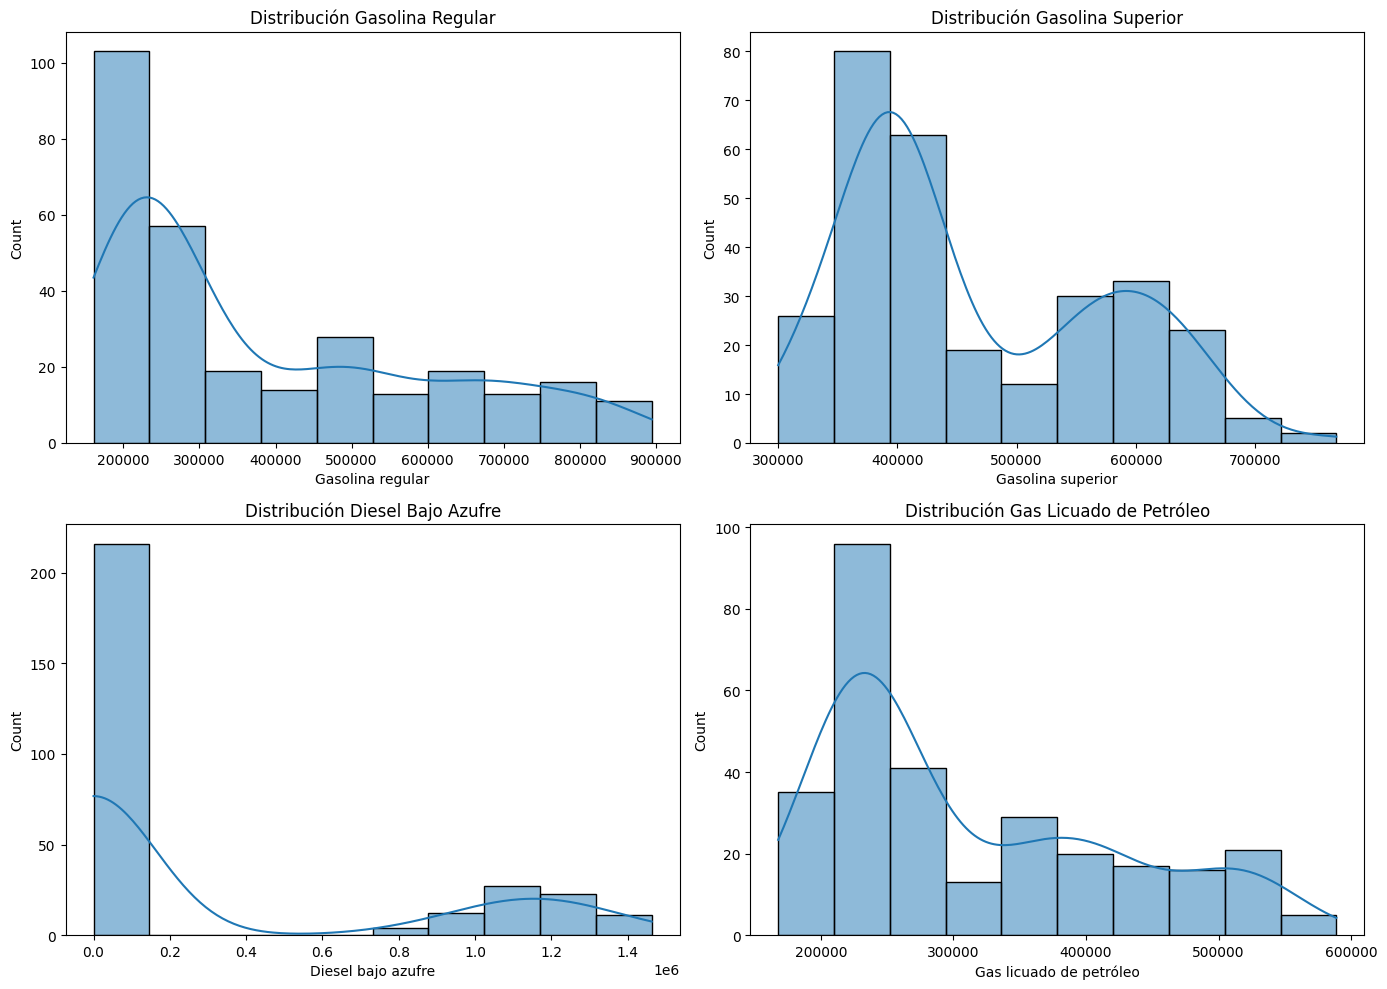

Gasolina Regular Normalidad: False
Gasolina Superior Normalidad: False
Diesel Bajo Azufre Normalidad: False
Gas Licuado de Petróleo Normalidad: False


In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest

# Función para comprobar la normalidad
def check_normality(data):
    stat, p = normaltest(data)
    return p > 0.05

# Histograma de cada columna
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(consumo_df['Gasolina regular'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribución Gasolina Regular')

sns.histplot(consumo_df['Gasolina superior'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribución Gasolina Superior')

sns.histplot(consumo_df['Diesel bajo azufre'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribución Diesel Bajo Azufre')

sns.histplot(consumo_df['Gas licuado de petróleo'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribución Gas Licuado de Petróleo')

plt.tight_layout()
plt.show()

# Verificar normalidad
print("Gasolina Regular Normalidad:", check_normality(consumo_df['Gasolina regular']))
print("Gasolina Superior Normalidad:", check_normality(consumo_df['Gasolina superior']))
print("Diesel Bajo Azufre Normalidad:", check_normality(consumo_df['Diesel bajo azufre']))
print("Gas Licuado de Petróleo Normalidad:", check_normality(consumo_df['Gas licuado de petróleo']))


In [105]:
# Convertir la columna 'Fecha' a datetime si aún no se ha hecho
importacion_df['Fecha'] = pd.to_datetime(importacion_df['Fecha'])

# Crear las columnas 'Año' y 'Mes'
importacion_df['Año'] = importacion_df['Fecha'].dt.year
importacion_df['Mes'] = importacion_df['Fecha'].dt.month



         Fecha  Gasolina regular  Gasolina superior  Diesel bajo azufre  \
228 2020-01-01         629414.90          573220.63           999181.20   
229 2020-02-01         741509.07          611314.13          1237018.37   
230 2020-03-01         735491.29          809640.18          1367335.14   
231 2020-04-01         329134.18          453153.09           834366.52   
232 2020-05-01         415805.82          170292.50           691066.44   

     Gas licuado de petróleo   Año  Mes  
228                715600.32  2020    1  
229                451331.70  2020    2  
230                643278.89  2020    3  
231                510349.93  2020    4  
232                616381.45  2020    5  


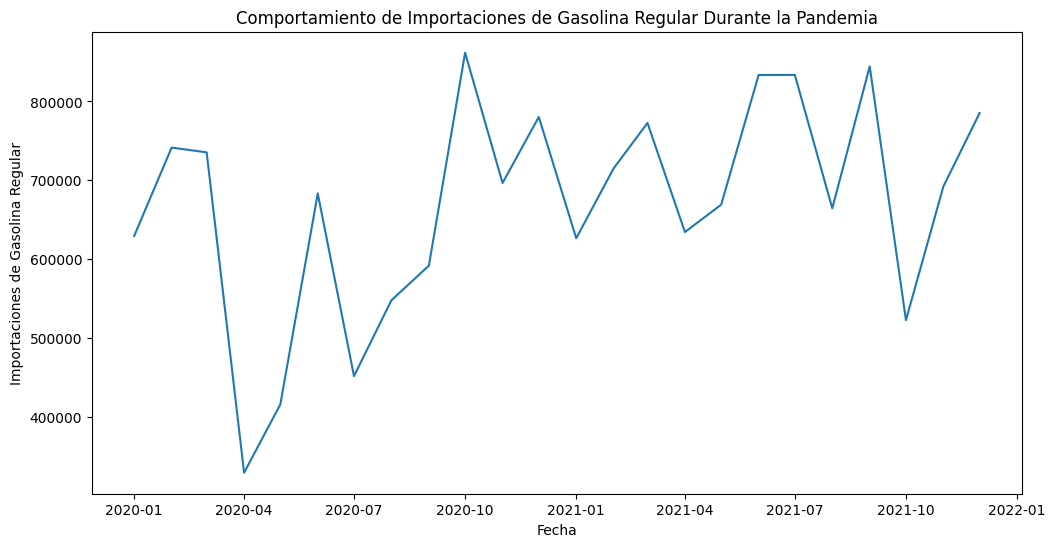

In [106]:
# Filtrar datos durante la pandemia
pandemia_df = importacion_df[(importacion_df['Año'] >= 2020) & (importacion_df['Año'] <= 2021)]

# Verificar el DataFrame filtrado
print(pandemia_df.head())

# Visualizar los datos
plt.figure(figsize=(12, 6))
sns.lineplot(data=pandemia_df, x='Fecha', y='Gasolina regular')
plt.title('Comportamiento de Importaciones de Gasolina Regular Durante la Pandemia')
plt.xlabel('Fecha')
plt.ylabel('Importaciones de Gasolina Regular')
plt.show()


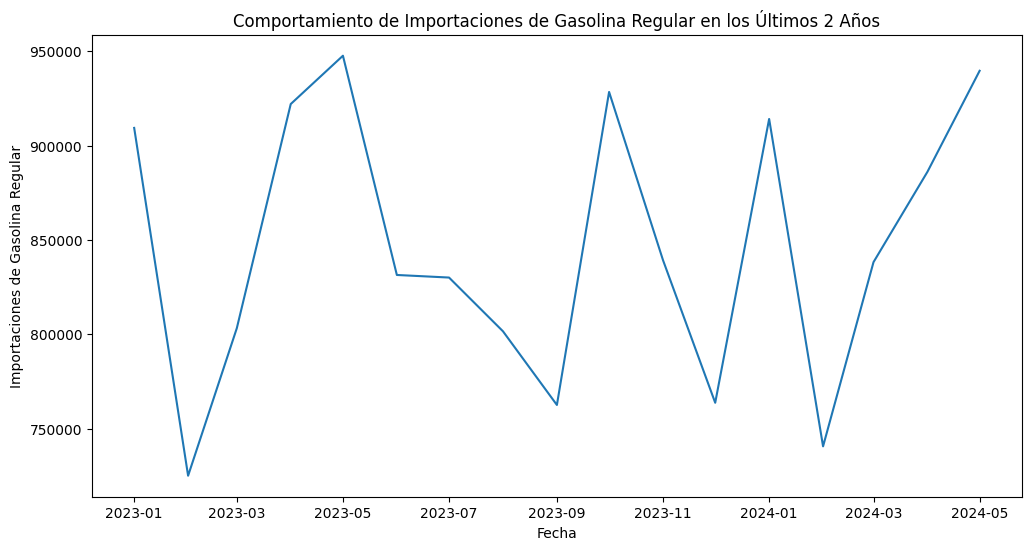

In [107]:
# Filtrar los últimos x años 
ultimos_anos_df = importacion_df[importacion_df['Año'] >= importacion_df['Año'].max() - 1]

plt.figure(figsize=(12, 6))
sns.lineplot(data=ultimos_anos_df, x='Fecha', y='Gasolina regular')
plt.title('Comportamiento de Importaciones de Gasolina Regular en los Últimos 2 Años')
plt.xlabel('Fecha')
plt.ylabel('Importaciones de Gasolina Regular')
plt.show()


Van a trabajar con 3 de las siguientes series, al menos 1 de ellas debe estimar precios:

a. Consumo mensual de gasolina super, gasolina regular, diésel y gas licuado


In [108]:
import pandas as pd

# Cargar los datos
consumo_df = pd.read_csv('Consumo.csv')

# Filtrar columnas de interés
consumo_df = consumo_df[['Fecha', 'Gasolina regular', 'Gasolina superior', 'Diesel bajo azufre', 'Gas licuado de petróleo']]

# Convertir la columna 'Fecha' a datetime
consumo_df['Fecha'] = pd.to_datetime(consumo_df['Fecha'], errors='coerce')

# Eliminar filas con valores nulos en la columna 'Fecha'
consumo_df = consumo_df.dropna(subset=['Fecha'])

# Filtrar por un rango de fechas específico
start_date = '2018-01-01'
end_date = '2023-12-31'
consumo_df = consumo_df[(consumo_df['Fecha'] >= start_date) & (consumo_df['Fecha'] <= end_date)]

# Establecer la columna 'Fecha' como índice
consumo_df.set_index('Fecha', inplace=True)

# Resample para obtener el consumo mensual
consumo_mensual = consumo_df.resample('M').sum()

# Verificar el DataFrame procesado
print(consumo_mensual.head())


            Gasolina regular  Gasolina superior  Diesel bajo azufre  \
Fecha                                                                 
2018-01-31         528763.30          581802.98         1105628.890   
2018-02-28         502041.67          545210.00         1072071.670   
2018-03-31         571052.13          618402.18         1194136.180   
2018-04-30         526979.67          565665.72         1108452.970   
2018-05-31         544395.17          570129.66         1009750.145   

            Gas licuado de petróleo  
Fecha                                
2018-01-31            421848.920476  
2018-02-28            379239.067143  
2018-03-31            415125.896429  
2018-04-30            370434.605238  
2018-05-31            403094.744048  


C:\Users\rentt\AppData\Local\Temp\ipykernel_1592\2819293544.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  consumo_mensual = consumo_df.resample('M').sum()


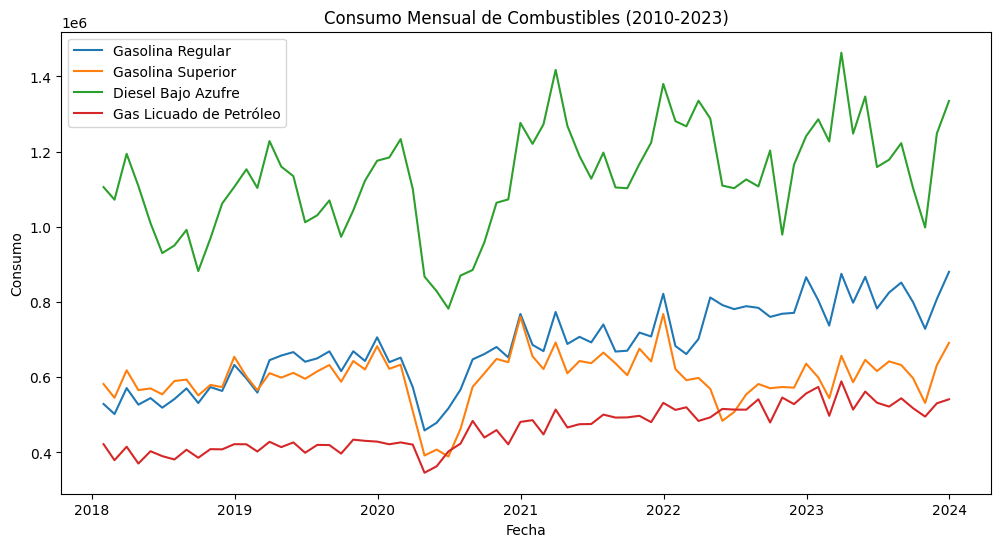

In [109]:
import matplotlib.pyplot as plt

# Graficar consumo mensual
plt.figure(figsize=(12, 6))
plt.plot(consumo_mensual.index, consumo_mensual['Gasolina regular'], label='Gasolina Regular')
plt.plot(consumo_mensual.index, consumo_mensual['Gasolina superior'], label='Gasolina Superior')
plt.plot(consumo_mensual.index, consumo_mensual['Diesel bajo azufre'], label='Diesel Bajo Azufre')
plt.plot(consumo_mensual.index, consumo_mensual['Gas licuado de petróleo'], label='Gas Licuado de Petróleo')
plt.title('Consumo Mensual de Combustibles (2010-2023)')
plt.xlabel('Fecha')
plt.ylabel('Consumo')
plt.legend()
plt.show()


b. Importación mensual de gasolina super gasolina regular, diésel y gas licuado


In [110]:
# Cargar los datos
importacion_df = pd.read_csv('Importacion.csv')

# Filtrar columnas de interés
importacion_df = importacion_df[['Fecha', 'Gasolina regular', 'Gasolina superior', 'Diesel bajo azufre', 'Gas licuado de petróleo']]

# Convertir la columna 'Fecha' a datetime
importacion_df['Fecha'] = pd.to_datetime(importacion_df['Fecha'], errors='coerce')

# Eliminar filas con valores nulos en la columna 'Fecha'
importacion_df = importacion_df.dropna(subset=['Fecha'])

# Filtrar por un rango de fechas específico
start_date = '2020-01-01'
end_date = '2023-12-31'
# Filtrar por un rango de fechas específico
importacion_df = importacion_df[(importacion_df['Fecha'] >= start_date) & (importacion_df['Fecha'] <= end_date)]

# Establecer la columna 'Fecha' como índice
importacion_df.set_index('Fecha', inplace=True)

# Resample para obtener la importación mensual
importacion_mensual = importacion_df.resample('M').sum()

# Verificar el DataFrame procesado
print(importacion_mensual.head())


            Gasolina regular  Gasolina superior  Diesel bajo azufre  \
Fecha                                                                 
2020-01-31         629414.90          573220.63           999181.20   
2020-02-29         741509.07          611314.13          1237018.37   
2020-03-31         735491.29          809640.18          1367335.14   
2020-04-30         329134.18          453153.09           834366.52   
2020-05-31         415805.82          170292.50           691066.44   

            Gas licuado de petróleo  
Fecha                                
2020-01-31                715600.32  
2020-02-29                451331.70  
2020-03-31                643278.89  
2020-04-30                510349.93  
2020-05-31                616381.45  


C:\Users\rentt\AppData\Local\Temp\ipykernel_1592\3306456381.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  importacion_mensual = importacion_df.resample('M').sum()


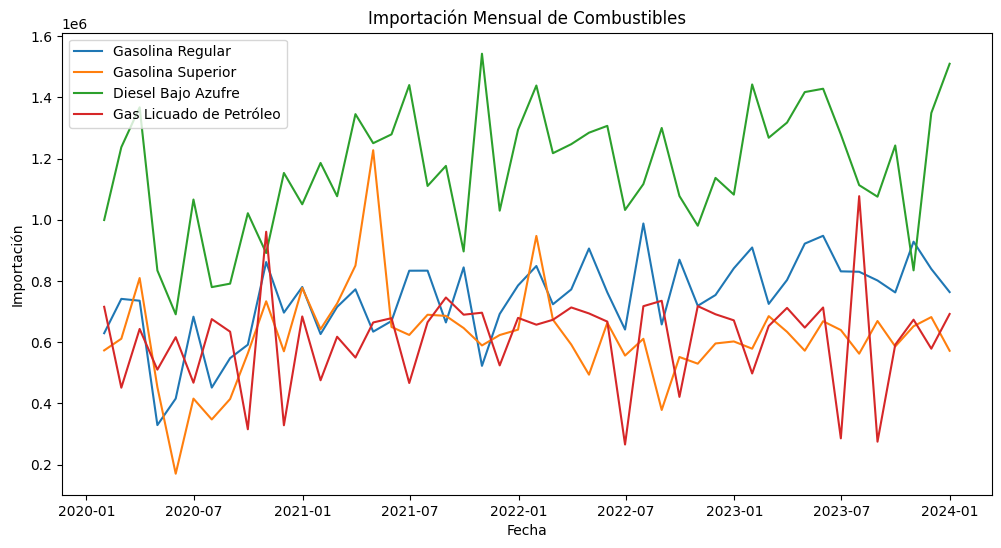

In [111]:
import matplotlib.pyplot as plt

# Graficar importación mensual
plt.figure(figsize=(12, 6))
plt.plot(importacion_mensual.index, importacion_mensual['Gasolina regular'], label='Gasolina Regular')
plt.plot(importacion_mensual.index, importacion_mensual['Gasolina superior'], label='Gasolina Superior')
plt.plot(importacion_mensual.index, importacion_mensual['Diesel bajo azufre'], label='Diesel Bajo Azufre')
plt.plot(importacion_mensual.index, importacion_mensual['Gas licuado de petróleo'], label='Gas Licuado de Petróleo')
plt.title('Importación Mensual de Combustibles')
plt.xlabel('Fecha')
plt.ylabel('Importación')
plt.legend()
plt.show()


c. Precios en ciudad capital de gasolina super, gasolina regular, diésel y gas licuado,
puede usar las de autoservicio o las de servicio completo

In [112]:
# Cargar los datos
precios_df = pd.read_csv('Precios.csv')

# Filtrar columnas de interés
precios_df = precios_df[['FECHA', 'Regular', 'Superior', 'Diesel', 'Glp Cilindro 25Lbs.']]

# Renombrar columnas para mayor claridad
precios_df.rename(columns={'FECHA': 'Fecha', 'Regular': 'Gasolina regular', 'Superior': 'Gasolina superior', 'Diesel': 'Diesel', 'Glp Cilindro 25Lbs.': 'Gas licuado de petróleo'}, inplace=True)

# Convertir la columna 'Fecha' a datetime
precios_df['Fecha'] = pd.to_datetime(precios_df['Fecha'], errors='coerce')

# Eliminar filas con valores nulos en la columna 'Fecha'
precios_df = precios_df.dropna(subset=['Fecha'])

# Filtrar por un rango de fechas específico
start_date = '2021-01-01'
end_date = '2023-12-31'
# Filtrar por un rango de fechas específico
precios_df = precios_df[(precios_df['Fecha'] >= start_date) & (precios_df['Fecha'] <= end_date)]

# Establecer la columna 'Fecha' como índice
precios_df.set_index('Fecha', inplace=True)

# Resample para obtener los precios mensuales
precios_mensuales = precios_df.resample('M').mean()

# Verificar el DataFrame procesado
print(precios_mensuales.head())


            Gasolina regular  Gasolina superior     Diesel  \
Fecha                                                        
2021-01-31         21.857419          22.657419  17.978065   
2021-02-28         23.460000          24.260000  19.460000   
2021-03-31         25.855806          26.652581  21.265161   
2021-04-30         26.030000          26.823000  20.655333   
2021-05-31         26.917742          27.718387  21.593226   

            Gas licuado de petróleo  
Fecha                                
2021-01-31               106.290645  
2021-02-28               116.000000  
2021-03-31               118.645161  
2021-04-30               120.000000  
2021-05-31               120.000000  


C:\Users\rentt\AppData\Local\Temp\ipykernel_1592\3257417852.py:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  precios_mensuales = precios_df.resample('M').mean()


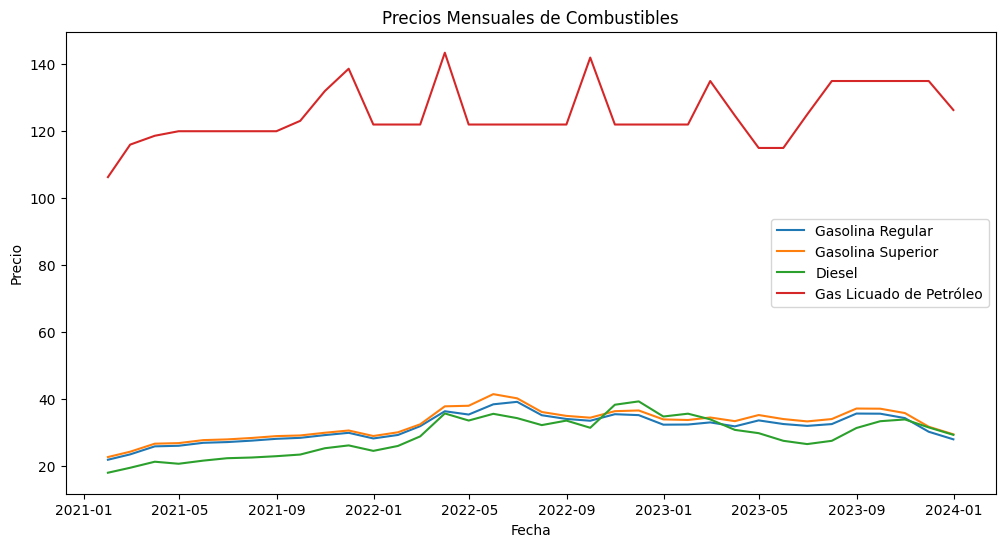

In [113]:
import matplotlib.pyplot as plt

# Graficar precios mensuales
plt.figure(figsize=(12, 6))
plt.plot(precios_mensuales.index, precios_mensuales['Gasolina regular'], label='Gasolina Regular')
plt.plot(precios_mensuales.index, precios_mensuales['Gasolina superior'], label='Gasolina Superior')
plt.plot(precios_mensuales.index, precios_mensuales['Diesel'], label='Diesel')
plt.plot(precios_mensuales.index, precios_mensuales['Gas licuado de petróleo'], label='Gas Licuado de Petróleo')
plt.title('Precios Mensuales de Combustibles')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()


# De cada serie de las seleccionadas

a) 
- Especifique Inicio, fin, y frecuenci

In [114]:
# Revisar el DataFrame procesado de consumo
print(consumo_mensual.head())
print(consumo_mensual.tail())

# Obtener el inicio, fin y frecuencia
inicio_consumo = consumo_mensual.index.min()
fin_consumo = consumo_mensual.index.max()
frecuencia_consumo = consumo_mensual.index.inferred_freq

print(f"Consumo Mensual - Inicio: {inicio_consumo}, Fin: {fin_consumo}, Frecuencia: {frecuencia_consumo}")


            Gasolina regular  Gasolina superior  Diesel bajo azufre  \
Fecha                                                                 
2018-01-31         528763.30          581802.98         1105628.890   
2018-02-28         502041.67          545210.00         1072071.670   
2018-03-31         571052.13          618402.18         1194136.180   
2018-04-30         526979.67          565665.72         1108452.970   
2018-05-31         544395.17          570129.66         1009750.145   

            Gas licuado de petróleo  
Fecha                                
2018-01-31            421848.920476  
2018-02-28            379239.067143  
2018-03-31            415125.896429  
2018-04-30            370434.605238  
2018-05-31            403094.744048  
            Gasolina regular  Gasolina superior  Diesel bajo azufre  \
Fecha                                                                 
2023-08-31         851754.02          632333.40          1222453.19   
2023-09-30         7998

- Haga un gráfico de la serie y explique qué información puede obtener a primera
vista

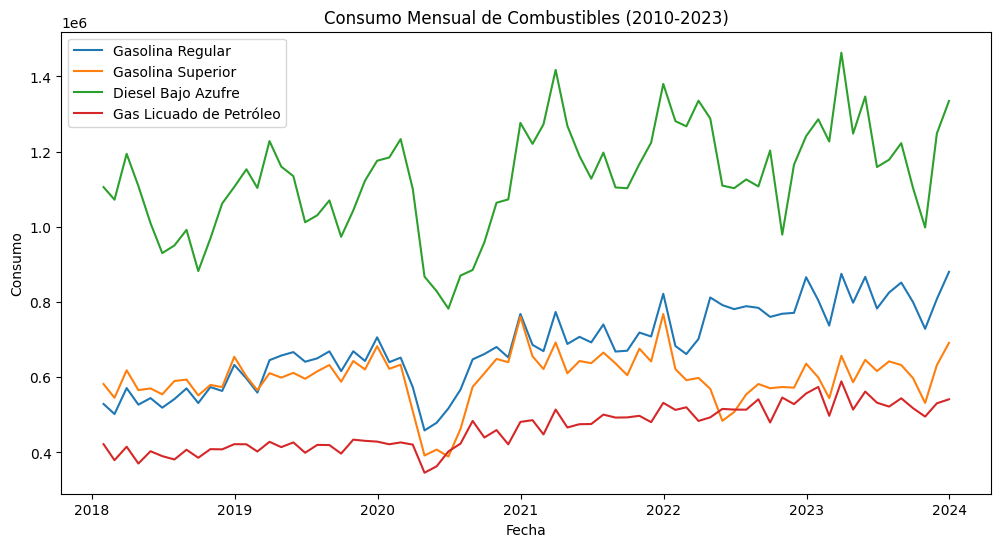

In [115]:
import matplotlib.pyplot as plt

# Graficar consumo mensual
plt.figure(figsize=(12, 6))
plt.plot(consumo_mensual.index, consumo_mensual['Gasolina regular'], label='Gasolina Regular')
plt.plot(consumo_mensual.index, consumo_mensual['Gasolina superior'], label='Gasolina Superior')
plt.plot(consumo_mensual.index, consumo_mensual['Diesel bajo azufre'], label='Diesel Bajo Azufre')
plt.plot(consumo_mensual.index, consumo_mensual['Gas licuado de petróleo'], label='Gas Licuado de Petróleo')
plt.title('Consumo Mensual de Combustibles (2010-2023)')
plt.xlabel('Fecha')
plt.ylabel('Consumo')
plt.legend()
plt.show()


- Descomponga la serie. Teniendo en cuenta el diagrama de la serie y sus
componentes discuta si es posible hablar de estacionariedad en media y en
varianza.

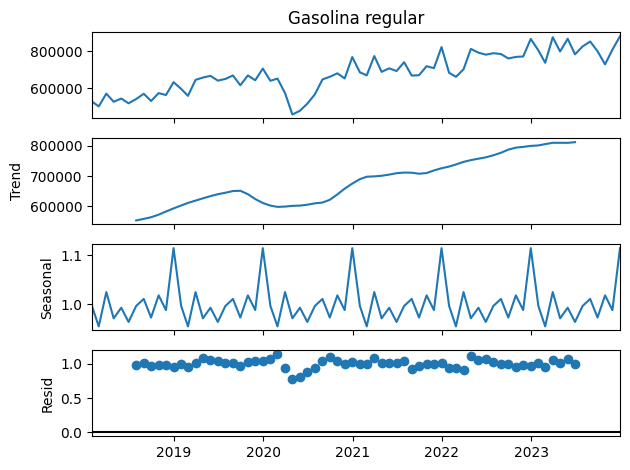

In [116]:
import statsmodels.api as sm

# Descomponer la serie de consumo mensual
descomposicion_consumo = sm.tsa.seasonal_decompose(consumo_mensual['Gasolina regular'], model='multiplicative', period=12)

# Graficar la descomposición
descomposicion_consumo.plot()
plt.show()


- Determine si es necesario transformar la serie. Explique.

In [117]:
from statsmodels.tsa.stattools import adfuller

# Prueba ADF para la serie original de consumo mensual
result = adfuller(consumo_mensual['Gasolina regular'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Hacemos lo mismo para importación mensual y precios mensuales
result_importacion = adfuller(importacion_mensual['Gasolina regular'].dropna())
print('ADF Statistic (Importación):', result_importacion[0])
print('p-value (Importación):', result_importacion[1])

result_precios = adfuller(precios_mensuales['Gasolina regular'].dropna())
print('ADF Statistic (Precios):', result_precios[0])
print('p-value (Precios):', result_precios[1])


ADF Statistic: -1.7049252959839365
p-value: 0.4285766195937699
ADF Statistic (Importación): -4.894919100205006
p-value (Importación): 3.5677293323226274e-05
ADF Statistic (Precios): -2.3130474869001283
p-value (Precios): 0.16779442124591654


Opción A: Consumo Mensual

ADF Statistic: -1.7049252959839365

p-value: 0.4285766195937699

La serie de consumo mensual no es estacionaria, ya que el p-valor es mayor que 0.05.

- Explique si no es estacionaria en media. Para esto:

i. Haga el gráfico de autocorrelación y úselo para explicar la no
estacionariedad en media.

ii. Básese en los valores de estadísticos como la prueba de Dickey-Fuller
Aumentada para corroborar la no estacionariedad en media. ¿Qué es
necesario hacer para hacerla estacionaria en media en caso de que no lo
sea?

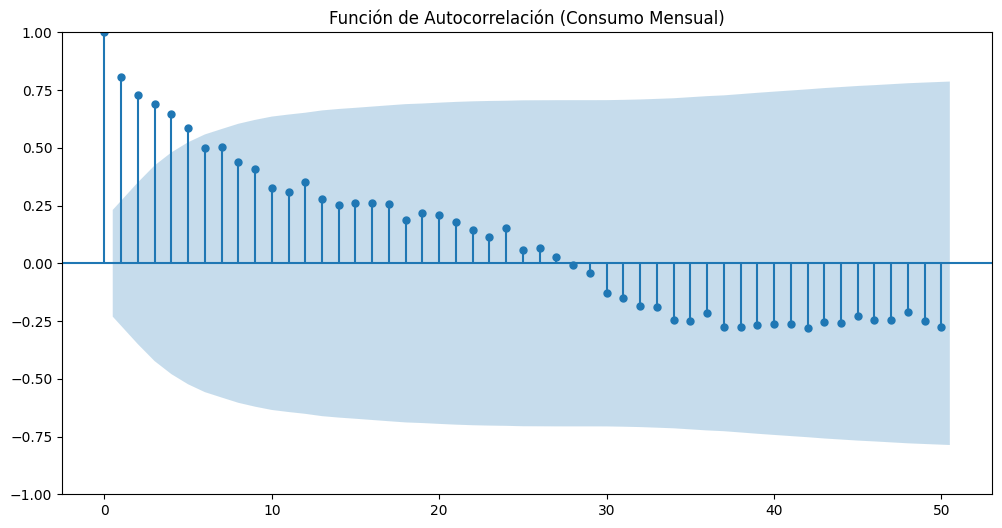

In [118]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Gráfico de autocorrelación para la serie original de consumo mensual
plt.figure(figsize=(12, 6))
plot_acf(consumo_mensual['Gasolina regular'].dropna(), lags=50, ax=plt.gca())
plt.title('Función de Autocorrelación (Consumo Mensual)')
plt.show()


In [119]:
# Diferenciación de la serie de consumo mensual
consumo_diff = consumo_mensual['Gasolina regular'].diff().dropna()

# Diferenciación de la serie de precios
precios_diff = precios_mensuales['Gasolina regular'].diff().dropna()

# Prueba ADF para las series diferenciadas
result_diff_consumo = adfuller(consumo_diff)
print('ADF Statistic (Diff Consumo):', result_diff_consumo[0])
print('p-value (Diff Consumo):', result_diff_consumo[1])

result_diff_precios = adfuller(precios_diff)
print('ADF Statistic (Diff Precios):', result_diff_precios[0])
print('p-value (Diff Precios):', result_diff_precios[1])


ADF Statistic (Diff Consumo): -11.9110185750175
p-value (Diff Consumo): 5.296569752096612e-22
ADF Statistic (Diff Precios): -4.489371301300771
p-value (Diff Precios): 0.00020552088002325476


- Una vez analizada la serie, elija los parámetros p, q y d del modelo ARMA o ARIMA
que utilizará para predecir. Explique en qué se basó para darle valor a estos
parámetros, basándose en las funciones de autocorrelación y autocorrelación
parcial. Si usa la función autoarima de R, determine y explique si tiene sentido el
modelo propuesto

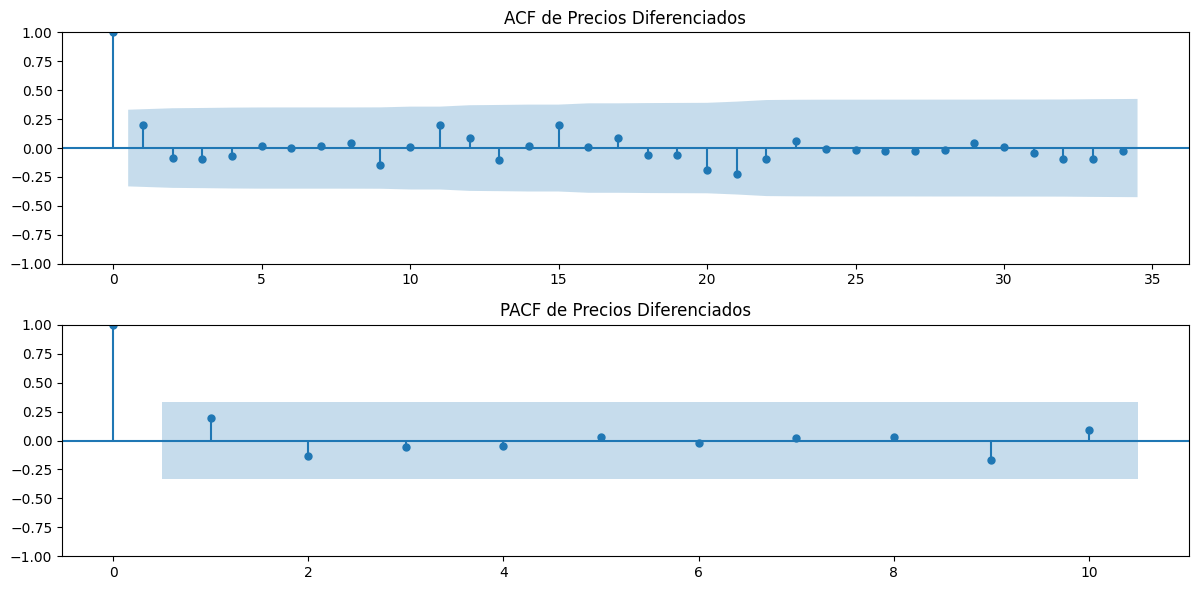

In [120]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Verifica y limpia datos
precios_diff_clean = precios_diff.dropna()

# Ajusta el número de rezagos para PACF
max_lags_pacf = min(10, len(precios_diff_clean) // 2 - 1)

# Gráficos de ACF y PACF
plt.figure(figsize=(12, 6))

plt.subplot(211)
plot_acf(precios_diff_clean, lags=min(50, len(precios_diff_clean)-1), ax=plt.gca())
plt.title('ACF de Precios Diferenciados')

plt.subplot(212)
plot_pacf(precios_diff_clean, lags=max_lags_pacf, ax=plt.gca())
plt.title('PACF de Precios Diferenciados')

plt.tight_layout()
plt.show()


- Haga varios modelos ARIMA, y diga cuál es el mejor de ellos para estimar los datos
de la serie. Para esto analice los residuos y las métricas AIC y/ BIC.

In [121]:
import pmdarima as pm

# Ajusta el modelo ARIMA usando auto_arima para sugerir parámetros
modelo_auto_arima = pm.auto_arima(
    precios_diff_clean,
    seasonal=False,
    stepwise=True,
    trace=True
)

print(f'Modelo sugerido por auto_arima: {modelo_auto_arima.summary()}')

# Ajuste manual de modelos ARIMA con diferentes parámetros
modelos = {
    'ARIMA(1,1,1)': pm.ARIMA(order=(1,1,1)).fit(precios_diff_clean),
    'ARIMA(1,1,2)': pm.ARIMA(order=(1,1,2)).fit(precios_diff_clean),
    'ARIMA(2,1,1)': pm.ARIMA(order=(2,1,1)).fit(precios_diff_clean),
    'ARIMA(2,1,2)': pm.ARIMA(order=(2,1,2)).fit(precios_diff_clean),
}

# Evaluación de modelos
resultados_modelos = {}
for nombre, modelo in modelos.items():
    aic = modelo.aic()
    bic = modelo.bic()
    residuos = modelo.resid()
    resultados_modelos[nombre] = {'AIC': aic, 'BIC': bic, 'Residuos': residuos}
    print(f'{nombre} - AIC: {aic}, BIC: {bic}')


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=150.870, Time=0.50 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=145.042, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=145.456, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=145.219, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=147.192, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=146.736, Time=0.01 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.776 seconds
Modelo sugerido por auto_arima:                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   35
Model:                        SARIMAX   Log Likelihood                 -71.521
Date:                Thu, 08 Aug 2024   AIC                            145.042
Time:                        22:25:00   BIC                            146.597
Sample:                    02-28-2021   HQIC                   

C:\Users\rentt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1,1,1) - AIC: 145.90025474531092, BIC: 152.00569684377555
ARIMA(1,1,2) - AIC: 147.60936361595142, BIC: 155.24116623903222
ARIMA(2,1,1) - AIC: 147.2503616795875, BIC: 154.88216430266831
ARIMA(2,1,2) - AIC: 149.36095146051383, BIC: 158.5191146082108


- Haga un modelo usando el algoritmo prophet de Facebook o redes neuronales.
Compárelo con los modelos del inciso anterior. ¿Cuál funcionó mejor?

In [122]:
import pmdarima as pm

# Ajustar el modelo
model = pm.auto_arima(precios_mensuales['Gasolina regular'].dropna(), seasonal=False, stepwise=True)
print(model.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   36
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -71.521
Date:                Thu, 08 Aug 2024   AIC                            145.042
Time:                        22:25:04   BIC                            146.597
Sample:                    01-31-2021   HQIC                           145.579
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         3.4869      0.806      4.325      0.000       1.907       5.067
Ljung-Box (L1) (Q):                   1.50   Jarque-Bera (JB):                 0.27
Prob(Q):                              0.22   Pr

b)
- Especifique Inicio, fin, y frecuenci

In [123]:
# Revisar el DataFrame procesado de importación
print(importacion_mensual.head())
print(importacion_mensual.tail())

# Obtener el inicio, fin y frecuencia
inicio_importacion = importacion_mensual.index.min()
fin_importacion = importacion_mensual.index.max()
frecuencia_importacion = importacion_mensual.index.inferred_freq

print(f"Importación Mensual - Inicio: {inicio_importacion}, Fin: {fin_importacion}, Frecuencia: {frecuencia_importacion}")


            Gasolina regular  Gasolina superior  Diesel bajo azufre  \
Fecha                                                                 
2020-01-31         629414.90          573220.63           999181.20   
2020-02-29         741509.07          611314.13          1237018.37   
2020-03-31         735491.29          809640.18          1367335.14   
2020-04-30         329134.18          453153.09           834366.52   
2020-05-31         415805.82          170292.50           691066.44   

            Gas licuado de petróleo  
Fecha                                
2020-01-31                715600.32  
2020-02-29                451331.70  
2020-03-31                643278.89  
2020-04-30                510349.93  
2020-05-31                616381.45  
            Gasolina regular  Gasolina superior  Diesel bajo azufre  \
Fecha                                                                 
2023-08-31         801621.75          669240.21          1075379.76   
2023-09-30         7625

- Haga un gráfico de la serie y explique qué información puede obtener a primera
vista

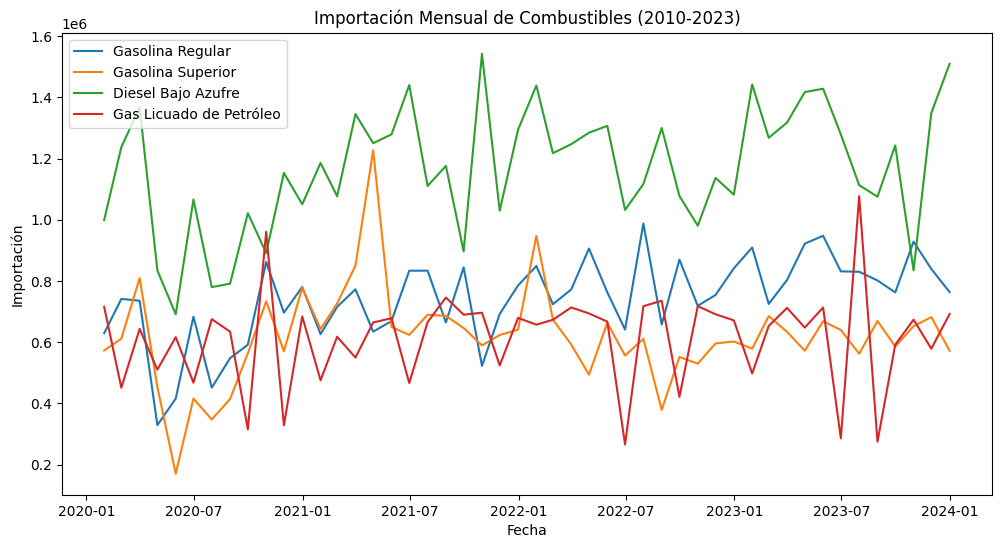

In [124]:
# Graficar importación mensual
plt.figure(figsize=(12, 6))
plt.plot(importacion_mensual.index, importacion_mensual['Gasolina regular'], label='Gasolina Regular')
plt.plot(importacion_mensual.index, importacion_mensual['Gasolina superior'], label='Gasolina Superior')
plt.plot(importacion_mensual.index, importacion_mensual['Diesel bajo azufre'], label='Diesel Bajo Azufre')
plt.plot(importacion_mensual.index, importacion_mensual['Gas licuado de petróleo'], label='Gas Licuado de Petróleo')
plt.title('Importación Mensual de Combustibles (2010-2023)')
plt.xlabel('Fecha')
plt.ylabel('Importación')
plt.legend()
plt.show()


- Descomponga la serie. Teniendo en cuenta el diagrama de la serie y sus
componentes discuta si es posible hablar de estacionariedad en media y en
varianza.

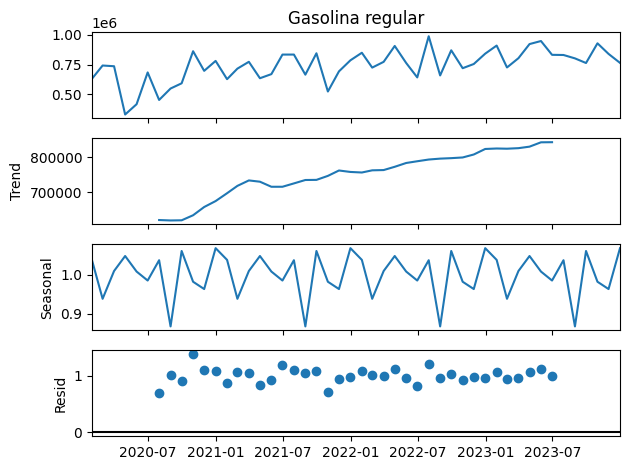

In [125]:
# Descomponer la serie de importación mensual
descomposicion_importacion = sm.tsa.seasonal_decompose(importacion_mensual['Gasolina regular'], model='multiplicative', period=12)

# Graficar la descomposición
descomposicion_importacion.plot()
plt.show()


- Determine si es necesario transformar la serie. Explique.

In [126]:
from statsmodels.tsa.stattools import adfuller

# Prueba ADF para la serie original de consumo mensual
result = adfuller(consumo_mensual['Gasolina regular'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Hacemos lo mismo para importación mensual y precios mensuales
result_importacion = adfuller(importacion_mensual['Gasolina regular'].dropna())
print('ADF Statistic (Importación):', result_importacion[0])
print('p-value (Importación):', result_importacion[1])

result_precios = adfuller(precios_mensuales['Gasolina regular'].dropna())
print('ADF Statistic (Precios):', result_precios[0])
print('p-value (Precios):', result_precios[1])


ADF Statistic: -1.7049252959839365
p-value: 0.4285766195937699
ADF Statistic (Importación): -4.894919100205006
p-value (Importación): 3.5677293323226274e-05
ADF Statistic (Precios): -2.3130474869001283
p-value (Precios): 0.16779442124591654


Opción B: Importación Mensual

ADF Statistic: -4.894919100205006

p-value: 3.5677293323226274e-05

La serie de importación mensual es estacionaria, ya que el p-valor es menor que 0.05.

- Una vez analizada la serie, elija los parámetros p, q y d del modelo ARMA o ARIMA
que utilizará para predecir. Explique en qué se basó para darle valor a estos
parámetros, basándose en las funciones de autocorrelación y autocorrelación
parcial. Si usa la función autoarima de R, determine y explique si tiene sentido el
modelo propuesto

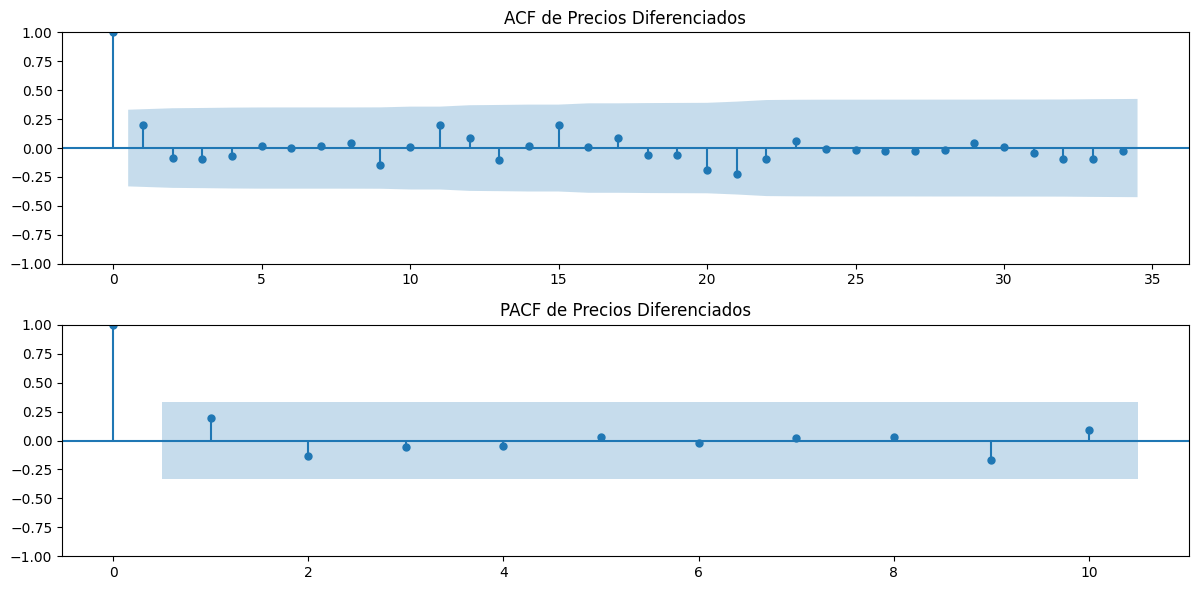

In [127]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Verifica y limpia datos
precios_diff_clean = precios_diff.dropna()

# Ajusta el número de rezagos para PACF
max_lags_pacf = min(10, len(precios_diff_clean) // 2 - 1)

# Gráficos de ACF y PACF
plt.figure(figsize=(12, 6))

plt.subplot(211)
plot_acf(precios_diff_clean, lags=min(50, len(precios_diff_clean)-1), ax=plt.gca())
plt.title('ACF de Precios Diferenciados')

plt.subplot(212)
plot_pacf(precios_diff_clean, lags=max_lags_pacf, ax=plt.gca())
plt.title('PACF de Precios Diferenciados')

plt.tight_layout()
plt.show()


- Haga varios modelos ARIMA, y diga cuál es el mejor de ellos para estimar los datos
de la serie. Para esto analice los residuos y las métricas AIC y/ BIC.

In [128]:
import pmdarima as pm

# Ajusta el modelo ARIMA usando auto_arima para sugerir parámetros
modelo_auto_arima = pm.auto_arima(
    precios_diff_clean,
    seasonal=False,
    stepwise=True,
    trace=True
)

print(f'Modelo sugerido por auto_arima: {modelo_auto_arima.summary()}')

# Ajuste manual de modelos ARIMA con diferentes parámetros
modelos = {
    'ARIMA(1,1,1)': pm.ARIMA(order=(1,1,1)).fit(precios_diff_clean),
    'ARIMA(1,1,2)': pm.ARIMA(order=(1,1,2)).fit(precios_diff_clean),
    'ARIMA(2,1,1)': pm.ARIMA(order=(2,1,1)).fit(precios_diff_clean),
    'ARIMA(2,1,2)': pm.ARIMA(order=(2,1,2)).fit(precios_diff_clean),
}

# Evaluación de modelos
resultados_modelos = {}
for nombre, modelo in modelos.items():
    aic = modelo.aic()
    bic = modelo.bic()
    residuos = modelo.resid()
    resultados_modelos[nombre] = {'AIC': aic, 'BIC': bic, 'Residuos': residuos}
    print(f'{nombre} - AIC: {aic}, BIC: {bic}')


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=150.870, Time=0.54 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=145.042, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=145.456, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=145.219, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=147.192, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=146.736, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.879 seconds
Modelo sugerido por auto_arima:                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   35
Model:                        SARIMAX   Log Likelihood                 -71.521
Date:                Thu, 08 Aug 2024   AIC                            145.042
Time:                        22:25:07   BIC                            146.597
Sample:                    02-28-2021   HQIC                   

C:\Users\rentt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1,1,1) - AIC: 145.90025474531092, BIC: 152.00569684377555
ARIMA(1,1,2) - AIC: 147.60936361595142, BIC: 155.24116623903222
ARIMA(2,1,1) - AIC: 147.2503616795875, BIC: 154.88216430266831
ARIMA(2,1,2) - AIC: 149.36095146051383, BIC: 158.5191146082108


- Haga un modelo usando el algoritmo prophet de Facebook o redes neuronales.
Compárelo con los modelos del inciso anterior. ¿Cuál funcionó mejor?

In [129]:
import pmdarima as pm

# Ajustar el modelo
model = pm.auto_arima(precios_mensuales['Gasolina regular'].dropna(), seasonal=False, stepwise=True)
print(model.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   36
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -71.521
Date:                Thu, 08 Aug 2024   AIC                            145.042
Time:                        22:25:10   BIC                            146.597
Sample:                    01-31-2021   HQIC                           145.579
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         3.4869      0.806      4.325      0.000       1.907       5.067
Ljung-Box (L1) (Q):                   1.50   Jarque-Bera (JB):                 0.27
Prob(Q):                              0.22   Pr

c)
- Especifique Inicio, fin, y frecuenci

In [130]:
# Revisar el DataFrame procesado de precios
print(precios_mensuales.head())
print(precios_mensuales.tail())

# Obtener el inicio, fin y frecuencia
inicio_precios = precios_mensuales.index.min()
fin_precios = precios_mensuales.index.max()
frecuencia_precios = precios_mensuales.index.inferred_freq

print(f"Precios Mensuales - Inicio: {inicio_precios}, Fin: {fin_precios}, Frecuencia: {frecuencia_precios}")


            Gasolina regular  Gasolina superior     Diesel  \
Fecha                                                        
2021-01-31         21.857419          22.657419  17.978065   
2021-02-28         23.460000          24.260000  19.460000   
2021-03-31         25.855806          26.652581  21.265161   
2021-04-30         26.030000          26.823000  20.655333   
2021-05-31         26.917742          27.718387  21.593226   

            Gas licuado de petróleo  
Fecha                                
2021-01-31               106.290645  
2021-02-28               116.000000  
2021-03-31               118.645161  
2021-04-30               120.000000  
2021-05-31               120.000000  
            Gasolina regular  Gasolina superior     Diesel  \
Fecha                                                        
2023-08-31         35.650645          37.152581  31.338387   
2023-09-30         35.611000          37.104333  33.368333   
2023-10-31         34.300645          35.802258  33

- Haga un gráfico de la serie y explique qué información puede obtener a primera
vista

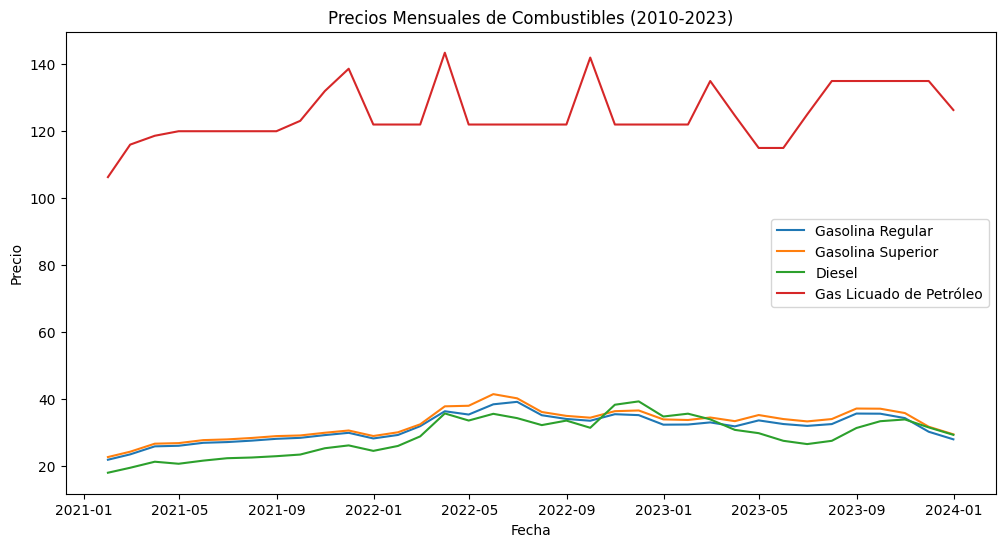

In [131]:
# Graficar precios mensuales
plt.figure(figsize=(12, 6))
plt.plot(precios_mensuales.index, precios_mensuales['Gasolina regular'], label='Gasolina Regular')
plt.plot(precios_mensuales.index, precios_mensuales['Gasolina superior'], label='Gasolina Superior')
plt.plot(precios_mensuales.index, precios_mensuales['Diesel'], label='Diesel')
plt.plot(precios_mensuales.index, precios_mensuales['Gas licuado de petróleo'], label='Gas Licuado de Petróleo')
plt.title('Precios Mensuales de Combustibles (2010-2023)')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()


- Descomponga la serie. Teniendo en cuenta el diagrama de la serie y sus
componentes discuta si es posible hablar de estacionariedad en media y en
varianza.

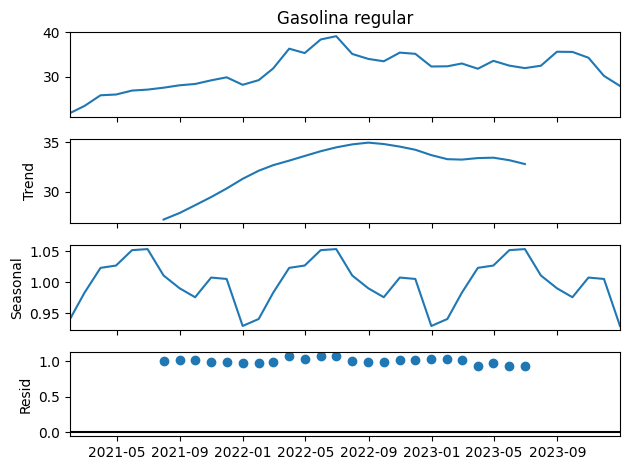

In [132]:
# Descomponer la serie de precios mensuales
descomposicion_precios = sm.tsa.seasonal_decompose(precios_mensuales['Gasolina regular'], model='multiplicative', period=12)

# Graficar la descomposición
descomposicion_precios.plot()
plt.show()


- Determine si es necesario transformar la serie. Explique.

In [133]:
from statsmodels.tsa.stattools import adfuller

# Prueba ADF para la serie original de consumo mensual
result = adfuller(consumo_mensual['Gasolina regular'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Hacemos lo mismo para importación mensual y precios mensuales
result_importacion = adfuller(importacion_mensual['Gasolina regular'].dropna())
print('ADF Statistic (Importación):', result_importacion[0])
print('p-value (Importación):', result_importacion[1])

result_precios = adfuller(precios_mensuales['Gasolina regular'].dropna())
print('ADF Statistic (Precios):', result_precios[0])
print('p-value (Precios):', result_precios[1])


ADF Statistic: -1.7049252959839365
p-value: 0.4285766195937699
ADF Statistic (Importación): -4.894919100205006
p-value (Importación): 3.5677293323226274e-05
ADF Statistic (Precios): -2.3130474869001283
p-value (Precios): 0.16779442124591654


Opción C: Precios en Ciudad Capital

ADF Statistic: -2.3130474869001283

p-value: 0.16779442124591654

La serie de precios no es estacionaria, ya que el p-valor es mayor que 0.05.

- Una vez analizada la serie, elija los parámetros p, q y d del modelo ARMA o ARIMA
que utilizará para predecir. Explique en qué se basó para darle valor a estos
parámetros, basándose en las funciones de autocorrelación y autocorrelación
parcial. Si usa la función autoarima de R, determine y explique si tiene sentido el
modelo propuesto

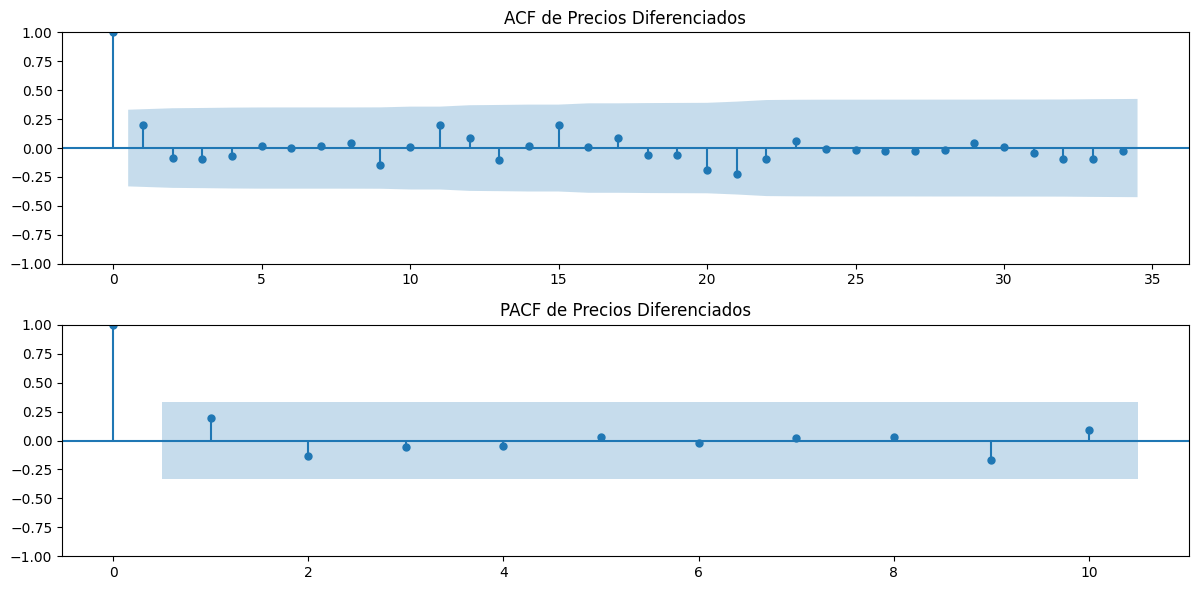

In [134]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Verifica y limpia datos
precios_diff_clean = precios_diff.dropna()

# Ajusta el número de rezagos para PACF
max_lags_pacf = min(10, len(precios_diff_clean) // 2 - 1)

# Gráficos de ACF y PACF
plt.figure(figsize=(12, 6))

plt.subplot(211)
plot_acf(precios_diff_clean, lags=min(50, len(precios_diff_clean)-1), ax=plt.gca())
plt.title('ACF de Precios Diferenciados')

plt.subplot(212)
plot_pacf(precios_diff_clean, lags=max_lags_pacf, ax=plt.gca())
plt.title('PACF de Precios Diferenciados')

plt.tight_layout()
plt.show()


- Haga varios modelos ARIMA, y diga cuál es el mejor de ellos para estimar los datos
de la serie. Para esto analice los residuos y las métricas AIC y/ BIC.

In [135]:
import pmdarima as pm

# Ajusta el modelo ARIMA usando auto_arima para sugerir parámetros
modelo_auto_arima = pm.auto_arima(
    precios_diff_clean,
    seasonal=False,
    stepwise=True,
    trace=True
)

print(f'Modelo sugerido por auto_arima: {modelo_auto_arima.summary()}')

# Ajuste manual de modelos ARIMA con diferentes parámetros
modelos = {
    'ARIMA(1,1,1)': pm.ARIMA(order=(1,1,1)).fit(precios_diff_clean),
    'ARIMA(1,1,2)': pm.ARIMA(order=(1,1,2)).fit(precios_diff_clean),
    'ARIMA(2,1,1)': pm.ARIMA(order=(2,1,1)).fit(precios_diff_clean),
    'ARIMA(2,1,2)': pm.ARIMA(order=(2,1,2)).fit(precios_diff_clean),
}

# Evaluación de modelos
resultados_modelos = {}
for nombre, modelo in modelos.items():
    aic = modelo.aic()
    bic = modelo.bic()
    residuos = modelo.resid()
    resultados_modelos[nombre] = {'AIC': aic, 'BIC': bic, 'Residuos': residuos}
    print(f'{nombre} - AIC: {aic}, BIC: {bic}')


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=150.870, Time=0.66 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=145.042, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=145.456, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=145.219, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=147.192, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=146.736, Time=0.01 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.908 seconds
Modelo sugerido por auto_arima:                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   35
Model:                        SARIMAX   Log Likelihood                 -71.521
Date:                Thu, 08 Aug 2024   AIC                            145.042
Time:                        22:25:12   BIC                            146.597
Sample:                    02-28-2021   HQIC                   

C:\Users\rentt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1,1,1) - AIC: 145.90025474531092, BIC: 152.00569684377555
ARIMA(1,1,2) - AIC: 147.60936361595142, BIC: 155.24116623903222
ARIMA(2,1,1) - AIC: 147.2503616795875, BIC: 154.88216430266831
ARIMA(2,1,2) - AIC: 149.36095146051383, BIC: 158.5191146082108


- Haga un modelo usando el algoritmo prophet de Facebook o redes neuronales.
Compárelo con los modelos del inciso anterior. ¿Cuál funcionó mejor?

In [136]:
import pmdarima as pm

# Ajustar el modelo
model = pm.auto_arima(precios_mensuales['Gasolina regular'].dropna(), seasonal=False, stepwise=True)
print(model.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   36
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -71.521
Date:                Thu, 08 Aug 2024   AIC                            145.042
Time:                        22:25:14   BIC                            146.597
Sample:                    01-31-2021   HQIC                           145.579
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         3.4869      0.806      4.325      0.000       1.907       5.067
Ljung-Box (L1) (Q):                   1.50   Jarque-Bera (JB):                 0.27
Prob(Q):                              0.22   Pr

## Parte 4

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=1.51 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=621.461, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=620.217, Time=0.12 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=613.987, Time=0.10 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=623.912, Time=0.01 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=614.832, Time=0.06 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=612.927, Time=0.27 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=614.778, Time=0.11 sec
 ARIMA(0,0,1)(2,1,1)[12] intercept   : AIC=614.886, Time=0.76 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=614.880, Time=2.27 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=612.896, Time=0.34 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=615.455, Time=0.08 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=618.215, Time=0.54 sec
 ARIMA(0,0,2)(0,1,2)[12] intercept   : AIC=613.318, Time=0.34 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   

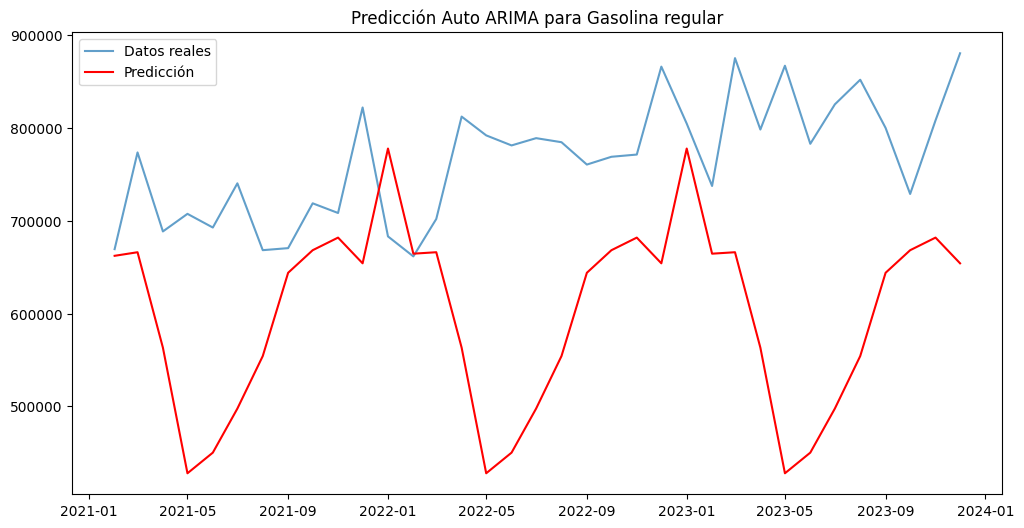

Resultados para Gasolina regular:
Modelo sugerido por auto_arima:                                      SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   36
Model:             SARIMAX(0, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -302.303
Date:                            Thu, 08 Aug 2024   AIC                            610.606
Time:                                    22:25:25   BIC                            614.141
Sample:                                01-01-2018   HQIC                           611.544
                                     - 12-01-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2523      0.154      1.639     

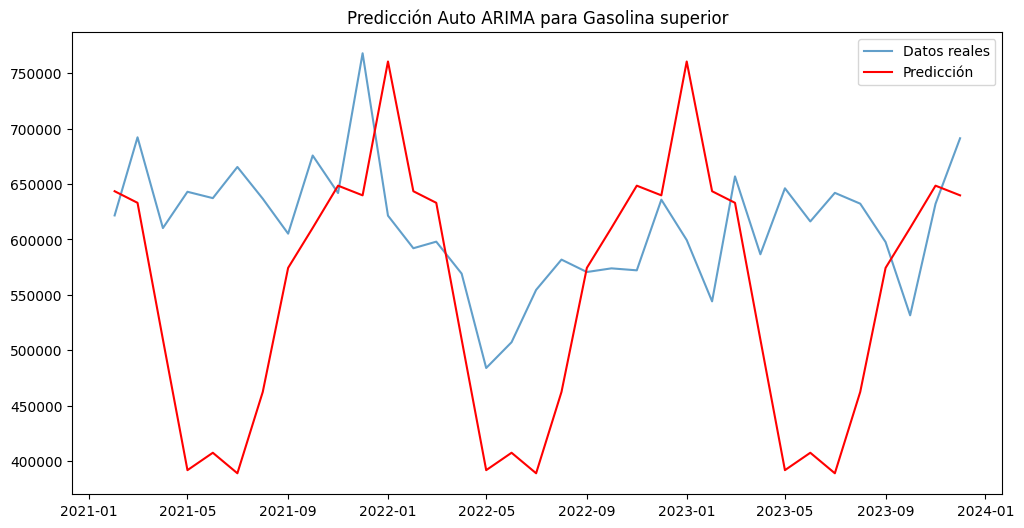

Resultados para Gasolina superior:
Modelo sugerido por auto_arima:                                       SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                   36
Model:             SARIMAX(0, 0, 1)x(0, 1, [], 12)   Log Likelihood                -304.620
Date:                             Thu, 08 Aug 2024   AIC                            613.240
Time:                                     22:25:33   BIC                            615.596
Sample:                                 01-01-2018   HQIC                           613.865
                                      - 12-01-2020                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2941      0.086      3

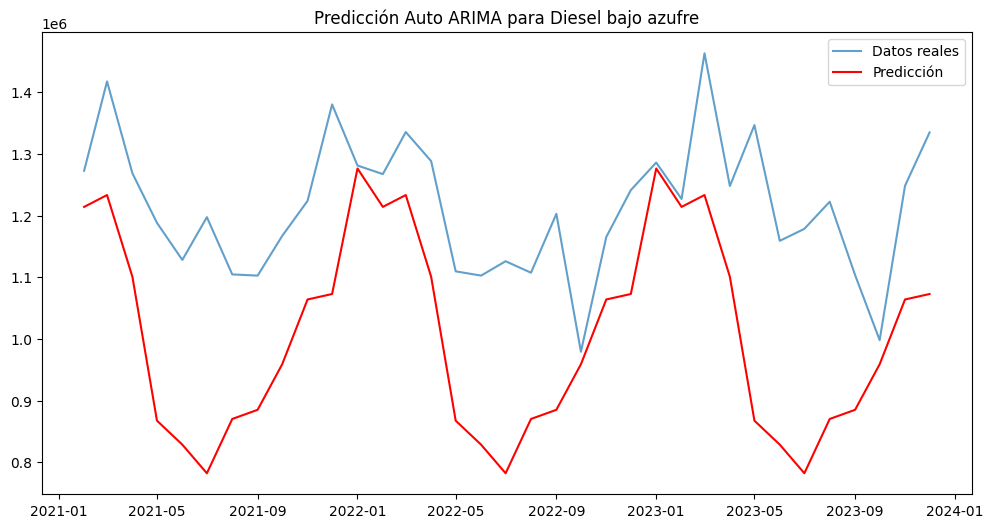

Resultados para Diesel bajo azufre:
Modelo sugerido por auto_arima:                                       SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                   36
Model:             SARIMAX(0, 0, 1)x(0, 1, [], 12)   Log Likelihood                -313.989
Date:                             Thu, 08 Aug 2024   AIC                            631.977
Time:                                     22:25:39   BIC                            634.333
Sample:                                 01-01-2018   HQIC                           632.602
                                      - 12-01-2020                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2590      0.090      

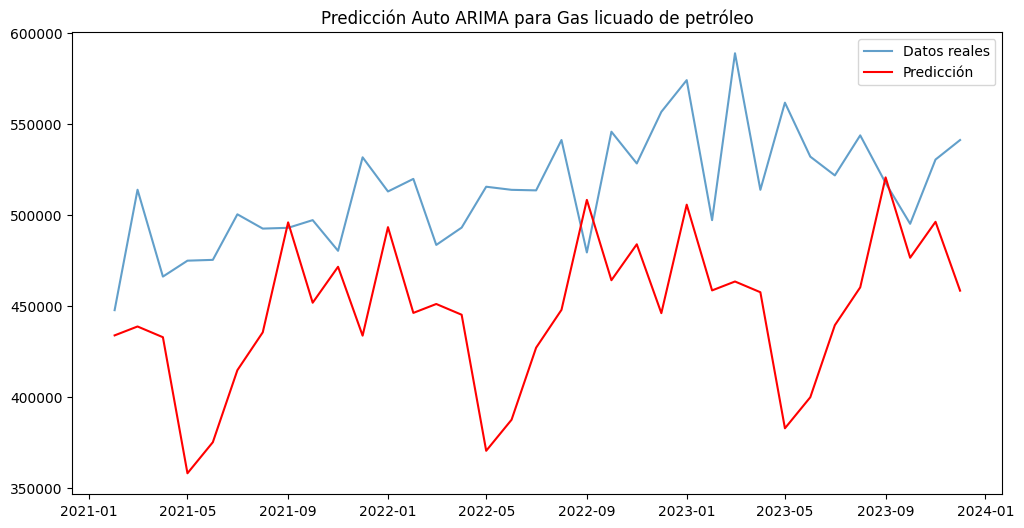

Resultados para Gas licuado de petróleo:
Modelo sugerido por auto_arima:                                 SARIMAX Results                                 
Dep. Variable:                        y   No. Observations:                   36
Model:             SARIMAX(0, 1, 0, 12)   Log Likelihood                -281.315
Date:                  Thu, 08 Aug 2024   AIC                            566.629
Time:                          22:25:43   BIC                            568.986
Sample:                      01-01-2018   HQIC                           567.254
                           - 12-01-2020                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.235e+04   7410.329      1.667      0.096   -2174.463    2.69e+04
sigma2      8.885e+08   2.32e+08      3.83

In [137]:
import pandas as pd
import numpy as np
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

combustibles = ['Gasolina regular', 'Gasolina superior', 'Diesel bajo azufre', 'Gas licuado de petróleo']
series_dict = {}

for combustible in combustibles:
    series = consumo_df[combustible]
    series.index = pd.to_datetime(consumo_df.index)
    series_dict[combustible] = series

# Función para ajustar el modelo ARIMA y visualizar resultados
def analizar_serie(nombre, serie):
    # Dividimos los datos en conjunto de entrenamiento y prueba
    train = serie.loc[:'2020-12-31']  # Datos hasta finales de 2020
    test = serie.loc['2021-01-31':]   # Datos desde 2021 en adelante

    # Ajustamos el modelo auto_arima con parámetros modificados
    modelo = auto_arima(train, 
                        seasonal=True,
                        m=12,
                        start_p=1, start_q=1,
                        max_p=3, max_q=3,
                        d=None, max_d=2,
                        trace=True,
                        error_action='ignore',   
                        suppress_warnings=True,
                        stepwise=True)

    # Realizamos la predicción para el período de prueba
    prediccion = modelo.predict(n_periods=len(test), return_conf_int=True)
    prediccion_mean = prediccion[0]

    # Visualizamos los resultados
    plt.figure(figsize=(12,6))
    plt.plot(test.index, test, label='Datos reales', alpha=0.7)
    plt.plot(test.index, prediccion_mean, label='Predicción', color='red')
    plt.title(f'Predicción Auto ARIMA para {nombre}')
    plt.legend()
    plt.show()

    print(f'Resultados para {nombre}:')
    print(f'Modelo sugerido por auto_arima: {modelo.summary()}\n')

# Aplicamos el análisis a cada serie
for nombre, serie in series_dict.items():
    analizar_serie(nombre, serie)

## Ejercicio 5

In [138]:
## Elegir elementos del 2024 a momento para graficar
consumo_24 = consumo_df.tail(5)

consumo_24

,Gasolina regular,Gasolina superior,Diesel bajo azufre,Gas licuado de petróleo
Fecha,,,,
2023-08-01,851754.02,632333.40,1222453.19,543825.64
2023-09-01,799852.73,597670.26,1103622.25,517699.48
2023-10-01,728741.16,531542.58,998113.39,495261.14
2023-11-01,807947.98,632180.03,1248223.75,530542.42
2023-12-01,880233.12,691389.62,1334692.15,541263.18


In [139]:
import pandas as pd
import numpy as np
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

combustibles = ['Gasolina regular', 'Gasolina superior', 'Diesel bajo azufre', 'Gas licuado de petróleo']
series_dict = {}

for combustible in combustibles:
    series = consumo_df[combustible]
    series.index = pd.to_datetime(consumo_df.index)
    series_dict[combustible] = series


def analizar_serie(nombre, serie):
    # Usamos todos los datos hasta 2023 para el entrenamiento
    train = serie.loc[:'2023-12-31']
    
    # Datos reales de 2024
    datos_reales_2024 = consumo_24[nombre]
    datos_reales_2024.index = pd.to_datetime(consumo_24['Fecha'])

    print(f"==>> datos_reales_2024:\n {datos_reales_2024}")

    # Ajustamos el modelo auto_arima con parámetros modificados
    modelo = auto_arima(train, 
                        seasonal=True,
                        m=12,
                        start_p=1, start_q=1,
                        max_p=3, max_q=3,
                        d=None, max_d=2,
                        trace=True,
                        error_action='ignore',   
                        suppress_warnings=True,
                        stepwise=True)

    # Realizamos la predicción para todo el año 2024
    prediccion = modelo.predict(n_periods=12, return_conf_int=True)
    prediccion_mean = prediccion[0]

    # Creamos un índice para las predicciones de 2024
    indice_prediccion = pd.date_range(start='2024-01-01', end='2024-12-31', freq='M')

    # Visualizamos los resultados
    plt.figure(figsize=(12,6))
    plt.plot(datos_reales_2024.index, datos_reales_2024, label='Datos reales 2024', alpha=0.7)
    plt.plot(indice_prediccion, prediccion_mean, label='Predicción 2024', color='red')
    plt.title(f'Predicción Auto ARIMA para {nombre} - Año 2024')
    plt.legend()
    plt.show()

    print(f'Resultados para {nombre}:')
    print(f'Modelo sugerido por auto_arima: {modelo.summary()}\n')

    # Calculamos métricas de error para los meses disponibles de 2024
    meses_disponibles = len(datos_reales_2024)
    mae = mean_absolute_error(datos_reales_2024, prediccion_mean[:meses_disponibles])
    rmse = np.sqrt(mean_squared_error(datos_reales_2024, prediccion_mean[:meses_disponibles]))

    print(f'Error Absoluto Medio (MAE) para los meses disponibles de 2024: {mae:.2f}')
    print(f'Raíz del Error Cuadrático Medio (RMSE) para los meses disponibles de 2024: {rmse:.2f}\n')

# Aplicamos el análisis a cada serie
for nombre, serie in series_dict.items():
    analizar_serie(nombre, serie)

KeyError: 'Fecha'

# Laboratorio 3 de Data Science

In [140]:
pip install tensorflow scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\rentt\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [141]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def prepare_data(data, n_steps):
    X, y = [], []
    for i in range(len(data)):
        end_ix = i + n_steps
        if end_ix > len(data)-1:
            break
        seq_x, seq_y = data[i:end_ix], data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Ejemplo con la serie de consumo
scaler = MinMaxScaler()
consumo_scaled = scaler.fit_transform(consumo_mensual.values)

n_steps = 12  # Usando 12 meses anteriores para predecir el siguiente
X_consumo, y_consumo = prepare_data(consumo_scaled, n_steps)

# Reshape para LSTM [samples, timesteps, features]
X_consumo = X_consumo.reshape((X_consumo.shape[0], X_consumo.shape[1], X_consumo.shape[2]))


serie de consumo

In [142]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Escalar los datos
scaler_consumo = MinMaxScaler()
consumo_scaled = scaler_consumo.fit_transform(consumo_mensual.values)

# Preparar los datos para LSTM
n_steps = 12
X_consumo, y_consumo = prepare_data(consumo_scaled, n_steps)

# Reshape para LSTM
X_consumo = X_consumo.reshape((X_consumo.shape[0], X_consumo.shape[1], X_consumo.shape[2]))


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Construir el modelo LSTM
def build_lstm_model(n_steps, n_features):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
    model.add(Dense(n_features))
    model.compile(optimizer='adam', loss='mse')
    return model

n_features = X_consumo.shape[2]
model_consumo = build_lstm_model(n_steps, n_features)

# Entrenar el modelo
model_consumo.fit(X_consumo, y_consumo, epochs=200, verbose=1)


Epoch 1/200


c:\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.3381
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3142 
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2824 
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2571 
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2041 
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1950  
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1639 
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1375
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1103
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0913  
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0658
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0558 
Epoch 13/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0552 
Epoch 14/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0577 
Epoch 15/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0492 
Epoch 16/200
2/2 ━━━━━━━━━━━━━

In [144]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

def build_lstm_model2(n_steps, n_features, lstm_units=50, dropout_rate=0.2):
    model = Sequential([
        LSTM(lstm_units, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)),
        Dropout(dropout_rate),
        LSTM(lstm_units, activation='relu'),
        Dropout(dropout_rate),
        Dense(n_features)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Definir parámetros
n_steps = X_consumo.shape[1]
n_features = X_consumo.shape[2]

# Construir el modelo
model_consumo = build_lstm_model2(n_steps, n_features)

# Entrenar el modelo
history = model_consumo.fit(
    X_consumo, y_consumo,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    verbose=2
)



C:\Users\rentt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
2/2 - 4s - 2s/step - loss: 0.3394 - val_loss: 0.5591
Epoch 2/200
2/2 - 0s - 37ms/step - loss: 0.3088 - val_loss: 0.5115
Epoch 3/200
2/2 - 0s - 36ms/step - loss: 0.2771 - val_loss: 0.4685
Epoch 4/200
2/2 - 0s - 37ms/step - loss: 0.2573 - val_loss: 0.4268
Epoch 5/200
2/2 - 0s - 80ms/step - loss: 0.2285 - val_loss: 0.3812
Epoch 6/200
2/2 - 0s - 36ms/step - loss: 0.2016 - val_loss: 0.3292
Epoch 7/200
2/2 - 0s - 37ms/step - loss: 0.1736 - val_loss: 0.2741
Epoch 8/200
2/2 - 0s - 34ms/step - loss: 0.1470 - val_loss: 0.2128
Epoch 9/200
2/2 - 0s - 36ms/step - loss: 0.1146 - val_loss: 0.1506
Epoch 10/200
2/2 - 0s - 36ms/step - loss: 0.0849 - val_loss: 0.1066
Epoch 11/200
2/2 - 0s - 43ms/step - loss: 0.0872 - val_loss: 0.1111
Epoch 12/200
2/2 - 0s - 38ms/step - loss: 0.1001 - val_loss: 0.1071
Epoch 13/200
2/2 - 0s - 46ms/step - loss: 0.0945 - val_loss: 0.0760
Epoch 14/200
2/2 - 0s - 89ms/step - loss: 0.0608 - val_loss: 0.0610
Epoch 15/200
2/2 - 0s - 47ms/step - loss: 0.0569 - val_loss

Serie de importacion

In [152]:
# Escalar los datos
scaler_importacion = MinMaxScaler()
importacion_scaled = scaler_importacion.fit_transform(importacion_mensual.values)

# Preparar los datos para LSTM
X_importacion, y_importacion = prepare_data(importacion_scaled, n_steps)

# Reshape para LSTM
X_importacion = X_importacion.reshape((X_importacion.shape[0], X_importacion.shape[1], X_importacion.shape[2]))


In [ ]:
n_features = X_importacion.shape[2]
model_importacion = build_lstm_model(n_steps, n_features)

# Entrenar el modelo
model_importacion.fit(X_importacion, y_importacion, epochs=200, verbose=1)


Epoch 1/200


c:\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4033
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3795 
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3520 
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3272 
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3015 
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2732 
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2505 
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2235 
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1953 
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1677 
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1359 
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1088 
Epoch 13/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0845 
Epoch 14/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0692 
Epoch 15/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0604 
Epoch 16/200
2/2 ━━━━━━━━━━━━━━━

In [153]:
n_features = X_importacion.shape[2]
model_importacion = build_lstm_model2(n_steps, n_features)

# Entrenar el modelo
model_importacion.fit(X_importacion, y_importacion, epochs=200, verbose=1)

Epoch 1/200


C:\Users\rentt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.3489
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3224
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2989 
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2687
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2395
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2158 
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1739 
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1392 
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0962
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0718
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0607
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0945
Epoch 13/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0729
Epoch 14/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0570
Epoch 15/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0458
Epoch 16/200
2/2 ━━━━━━━━━━━━━━

Serie de precios

In [154]:
# Escalar los datos
scaler_precios = MinMaxScaler()
precios_scaled = scaler_precios.fit_transform(precios_mensuales.values)

# Preparar los datos para LSTM
X_precios, y_precios = prepare_data(precios_scaled, n_steps)

# Reshape para LSTM
X_precios = X_precios.reshape((X_precios.shape[0], X_precios.shape[1], X_precios.shape[2]))


In [ ]:
n_features = X_precios.shape[2]
model_precios = build_lstm_model(n_steps, n_features)

# Entrenar el modelo
model_precios.fit(X_precios, y_precios, epochs=200, verbose=1)


Epoch 1/200


c:\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.5014
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.4844
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.4677
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.4515
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.4356
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.4197
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.4040
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.3880
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3718
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3551
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3381
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3208
Epoch 13/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.3028
Epoch 14/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2843
Epoch 15/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2650
Epoch 16/200
1/1 ━━━━━━━━━━━━━━━━

In [155]:
n_features = X_precios.shape[2]
model_precios = build_lstm_model2(n_steps, n_features)

# Entrenar el modelo
model_precios.fit(X_precios, y_precios, epochs=200, verbose=1)


Epoch 1/200


C:\Users\rentt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.4539
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.4302
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.4097
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.3919
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.3703
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.3425
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.3423
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.3156
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.3017
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.2709
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.2587
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.2388
Epoch 13/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.2282
Epoch 14/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.2037
Epoch 15/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1665
Epoch 16/200
1/1 ━━━━━━━━━━━━━━━